In [46]:
import pandas as pd
from pathlib import Path
import os
import seaborn as sns


In [60]:
sns.set_style("ticks")

# Smallest context:
sns.set_context("paper")
base_dir = Path().cwd()


# Container 

## Nginx Memory Analysis

In [14]:
### File paths
container_data = base_dir / "experiments" / "container"

def get_files(parent_folder:str, folder_name: str) -> Path:
    path = container_data / parent_folder / folder_name / "stats" / "csv"
    return {x.stem:x for x in path.iterdir()}
nginx_memory_data = get_files("nginx", "memory")
nginx_cpu_data = get_files("nginx", "cpu")
apache_memory_data = get_files("apache", "memory")
apache_cpu_data = get_files("apache", "cpu")



In [19]:
df_nginx_memory_4G_1 = pd.read_csv(nginx_memory_data["vmstats-4G-1"])
df_nginx_memory_4G_2 = pd.read_csv(nginx_memory_data["vmstats-4G-2"])
df_nginx_memory_4G_3= pd.read_csv(nginx_memory_data["vmstats-4G-3"])


# Remove first and last point as they are not representative
n=1
df_nginx_memory_4G_1.drop(df_nginx_memory_4G_1.tail(n).index,inplace=True)
df_nginx_memory_4G_1.drop(df_nginx_memory_4G_1.head(n).index,inplace=True)

df_nginx_memory_4G_2.drop(df_nginx_memory_4G_2.tail(n).index,inplace=True)
df_nginx_memory_4G_2.drop(df_nginx_memory_4G_2.head(n).index,inplace=True)

df_nginx_memory_4G_3.drop(df_nginx_memory_4G_3.tail(n).index,inplace=True)
df_nginx_memory_4G_3.drop(df_nginx_memory_4G_3.head(n).index,inplace=True)

In [44]:
num_rows = 115
years = list(range(5, 5 + num_rows, 5))
data_preproc = pd.DataFrame({
    'Seconds': years, 
    'Period 1': df_nginx_memory_4G_1["K used memory"] /1_000_000,
    'Period 2': df_nginx_memory_4G_2["K used memory"] /1_000_000,
    'Period 3': df_nginx_memory_4G_3["K used memory"] /1_000_000,}
    )

<AxesSubplot:xlabel='Seconds', ylabel='Memory Usage (GB)'>

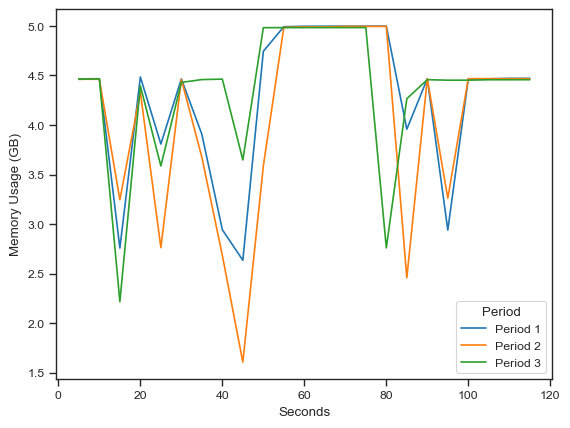

In [59]:
# Nginx Container Memory usage on each period run during 120 second 4G memory stress
sns.lineplot(x='Seconds', y='Memory Usage (GB)', hue='Period', palette="tab10",
             data=pd.melt(data_preproc, ['Seconds']).rename(columns={"variable": "Period", "value": "Memory Usage (GB)"}))

In [66]:
# Nginx Container average Memory usage during 120 second 4G memory stress
pd.melt(data_preproc, ['Seconds']).rename(columns={"variable": "Period", "value": "Memory Usage (GB)"})["Memory Usage (GB)"].mean()

4.216124115942028

<AxesSubplot:>

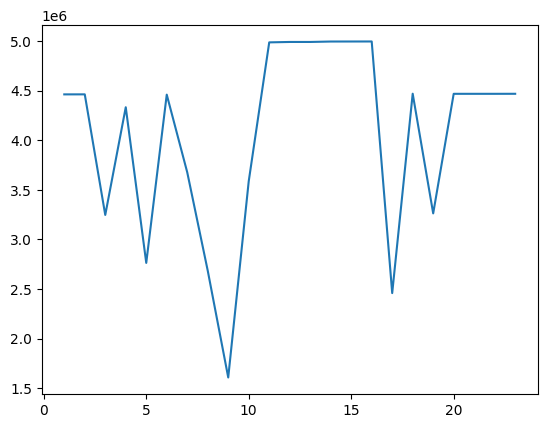

In [21]:
df_nginx_memory_4G_2["K used memory"].plot()

<AxesSubplot:>

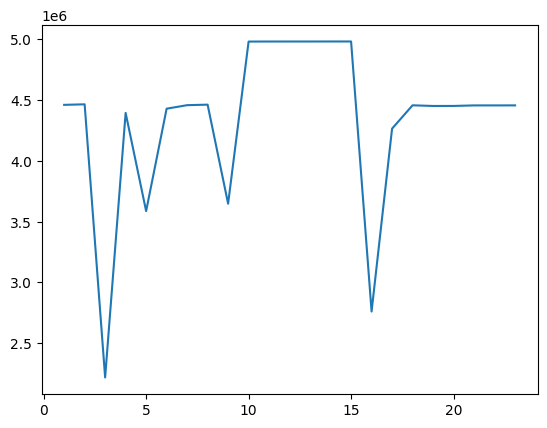

In [22]:
df_nginx_memory_4G_3["K used memory"].plot()

<AxesSubplot:>

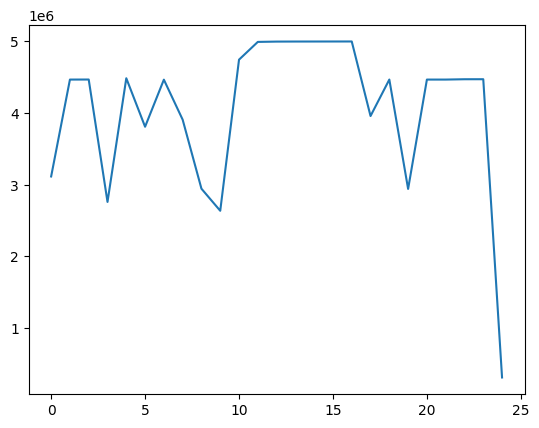

In [21]:
df["K used memory"].plot()

In [ ]:
df["K used memory"].plot()